In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [224]:
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['figure.dpi'] = 144

In [225]:
vectors = pd.read_csv('vec.csv')

In [226]:
vector_coords = vectors[(vectors.type == "vector") & (vectors.name == "posX:vector")]

In [227]:
def string_of_floats_to_list_of_floats(string, separator):
    return [float(n) for n in string.split(separator)]

In [228]:
x = string_of_floats_to_list_of_floats(vector_coords.iloc[[0]].vectime.values[0], ' ')

In [229]:
y = []

for t in x:
    tmp = 0
    for v in range(len(vector_coords)):
        times = string_of_floats_to_list_of_floats(vector_coords.iloc[[v]].vectime.values[0], ' ')
        if t in times:
            tmp += 1
    y.append(tmp)

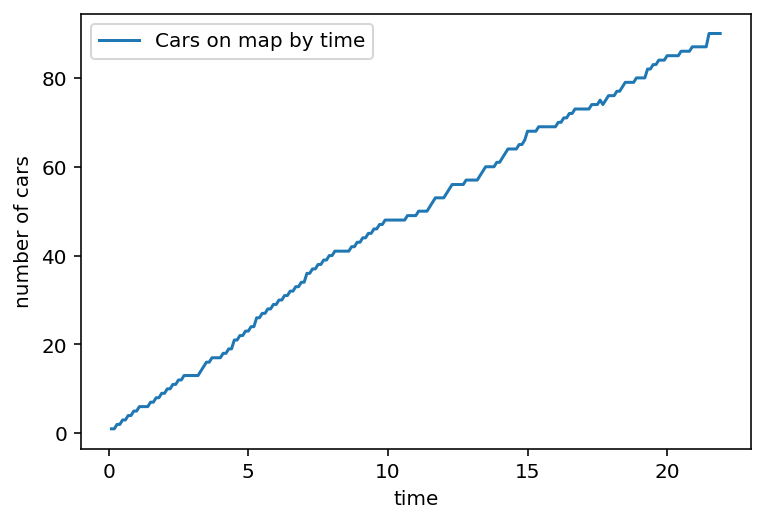

In [230]:
plt.plot(x,y, label="Cars on map by time")
plt.xlabel("time")
plt.ylabel("number of cars")
plt.legend()

In [231]:
car0 = vectors[(vectors.type == "vector") & (vectors.name == "allDetectedCars")].iloc[[0]]

In [232]:
x = string_of_floats_to_list_of_floats(car0.vectime.values[0], ' ')

In [233]:
y = string_of_floats_to_list_of_floats(car0.vecvalue.values[0], ' ')

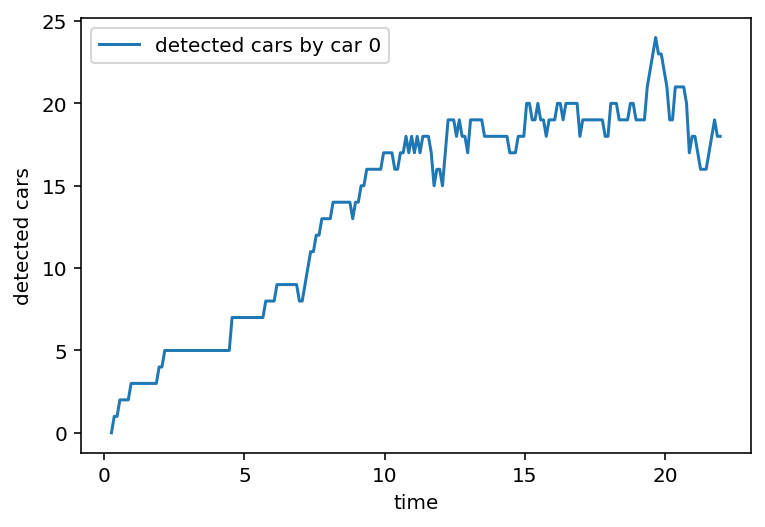

In [235]:
plt.plot(x,y, label="detected cars by car 0")
plt.xlabel("time")
plt.ylabel("detected cars")
plt.legend()

In [236]:
cbr0 = vectors[(vectors.type == "vector") & (vectors.name == "CBR.VanetRx")].iloc[[0]]

In [237]:
x = string_of_floats_to_list_of_floats(cbr0.vectime.values[0], ' ')

In [238]:
y = string_of_floats_to_list_of_floats(cbr0.vecvalue.values[0], ' ')

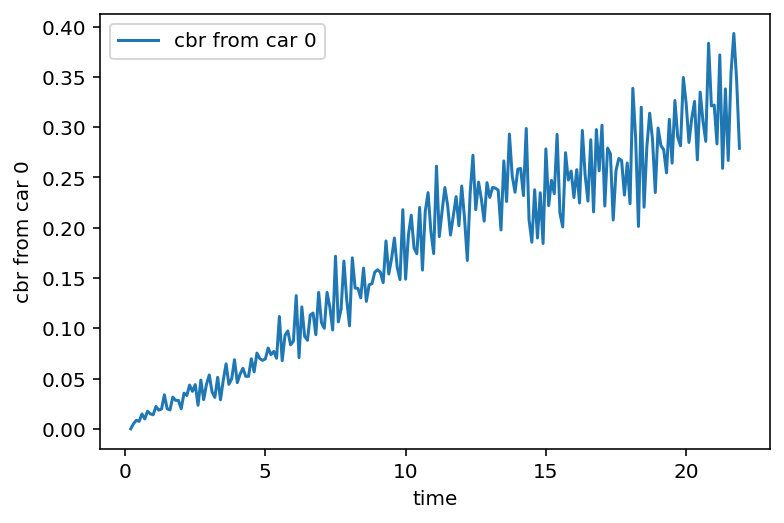

In [241]:
plt.plot(x,y, label="cbr from car 0")
plt.xlabel("time")
plt.ylabel("cbr from car 0")
plt.legend()

In [242]:
cbr = vectors[(vectors.type == "vector") & (vectors.name == "CBR.VanetRx")]

In [243]:
vectimes = [string_of_floats_to_list_of_floats(c.vectime, ' ') for c in cbr.itertuples()]
vecvalues = [string_of_floats_to_list_of_floats(c.vecvalue, ' ') for c in cbr.itertuples()]

time_values = []

for i in range(len(vectimes)):
    time_values.append(list(zip(vectimes[i], vecvalues[i])))

In [244]:
times = vectimes[0]
weight_of_time = 0
values = 0
vecvalues = []

for t in times:
    for tv in time_values:
        for time, value in tv:
            if t == time:
                weight_of_time += 1
                values += value
                break

    vecvalues.append(values / 90)
    weight_of_time = 0
    values = 0

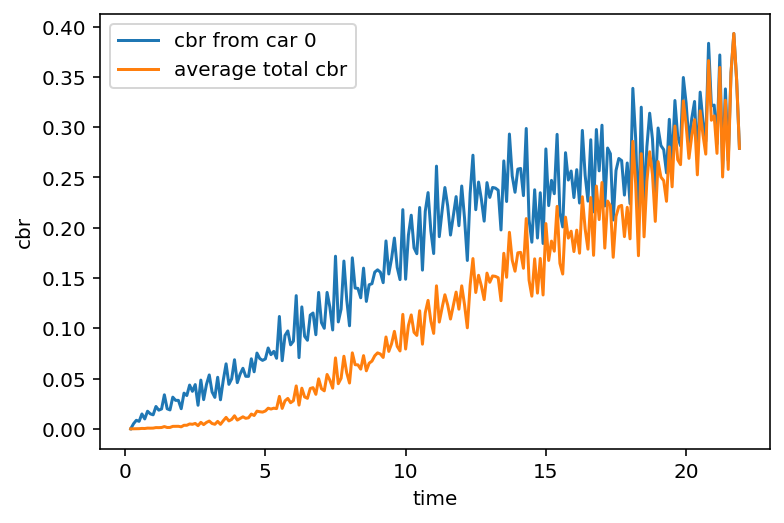

In [245]:
plt.plot(x,y, label="cbr from car 0")
plt.xlabel("time")
plt.ylabel("cbr")
plt.plot(times, vecvalues, label="average total cbr")
plt.legend()
plt.show()